In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MaxAbsScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("tested.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.drop(["PassengerId","Name","Sex","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [5]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,0,3,38.5,0,0,7.2500
416,0,3,NaN,0,0,8.0500


In [6]:
x=df.drop("Survived",axis=1)

In [7]:
y=df["Survived"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [9]:
s=StandardScaler()

In [10]:
x_train_s=s.fit_transform(x_train)
x_test_s=s.fit_transform(x_test)

In [11]:
x_train_s

array([[-1.52873521,  2.27391237, -0.49818521,  1.63648214,  0.80398027],
       [ 0.85838073, -2.0509261 , -0.49818521,  1.63648214, -0.36891052],
       [-0.33517724,  0.10028537, -0.49818521, -0.41879866, -0.39279196],
       ...,
       [ 0.85838073,  0.40595166,  0.55594581, -0.41879866, -0.31773601],
       [ 0.85838073,         nan, -0.49818521, -0.41879866, -0.48533253],
       [-0.33517724, -0.44312138, -0.49818521, -0.41879866, -0.43543738]])

In [12]:
c=s.get_feature_names_out()

In [13]:
x_train_s=pd.DataFrame(x_train_s,columns=c)

In [14]:
np.round(x_train_s.describe(),1)

,Pclass,Age,SibSp,Parch,Fare
count,292.0,233.0,292.0,292.0,291.0
mean,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.5,-2.1,-0.5,-0.4,-0.6
25%,-0.6,-0.6,-0.5,-0.4,-0.5
50%,0.9,-0.2,-0.5,-0.4,-0.4
75%,0.9,0.6,0.6,-0.4,-0.1
max,0.9,2.5,7.9,8.8,8.1


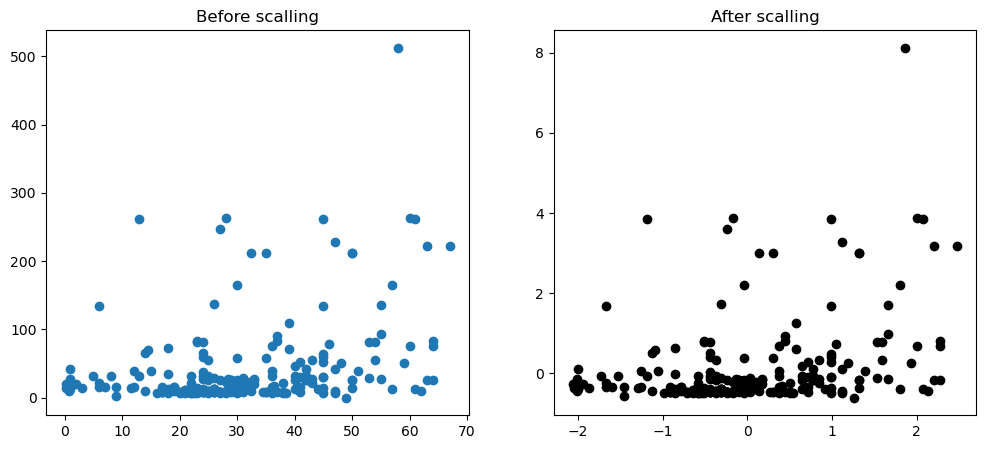

In [85]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Age"],x_train["Fare"])
a1.set_title("Before scalling")
a2.scatter(x_train_s["Age"],x_train_s["Fare"],color="black")
a2.set_title("After scalling")
plt.show()

In [16]:
m=MaxAbsScaler()

In [17]:
x_train_m=m.fit_transform(x_train)
x_test_m=m.fit_transform(x_test)

In [18]:
a=m.get_feature_names_out()

In [19]:
x_train_m=pd.DataFrame(x_train_m,columns=a)

In [20]:
np.round(x_train_m.describe(),1)

,Pclass,Age,SibSp,Parch,Fare
count,292.0,233.0,292.0,292.0,291.0
mean,0.8,0.5,0.1,0.0,0.1
std,0.3,0.2,0.1,0.1,0.1
min,0.3,0.0,0.0,0.0,0.0
25%,0.6,0.3,0.0,0.0,0.0
50%,1.0,0.4,0.0,0.0,0.0
75%,1.0,0.6,0.1,0.0,0.1
max,1.0,1.0,1.0,1.0,1.0


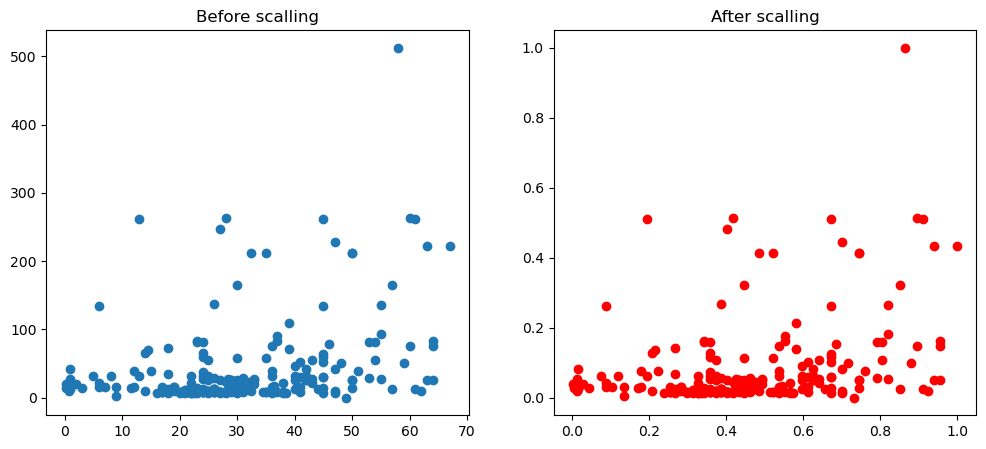

In [21]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Age"],x_train["Fare"])
a1.set_title("Before scalling")
a2.scatter(x_train_m["Age"],x_train_m["Fare"],color="red")
a2.set_title("After scalling")
plt.show()

In [22]:
s=MinMaxScaler()

In [23]:
x_train_min=s.fit_transform(x_train)
x_test_min=s.fit_transform(x_test)

In [24]:
d=s.get_feature_names_out()

In [25]:
x_train_min=pd.DataFrame(x_train_min,columns=d)

In [26]:
np.round(x_train_min.describe(),1)

,Pclass,Age,SibSp,Parch,Fare
count,292.0,233.0,292.0,292.0,291.0
mean,0.6,0.5,0.1,0.0,0.1
std,0.4,0.2,0.1,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0
25%,0.4,0.3,0.0,0.0,0.0
50%,1.0,0.4,0.0,0.0,0.0
75%,1.0,0.6,0.1,0.0,0.1
max,1.0,1.0,1.0,1.0,1.0


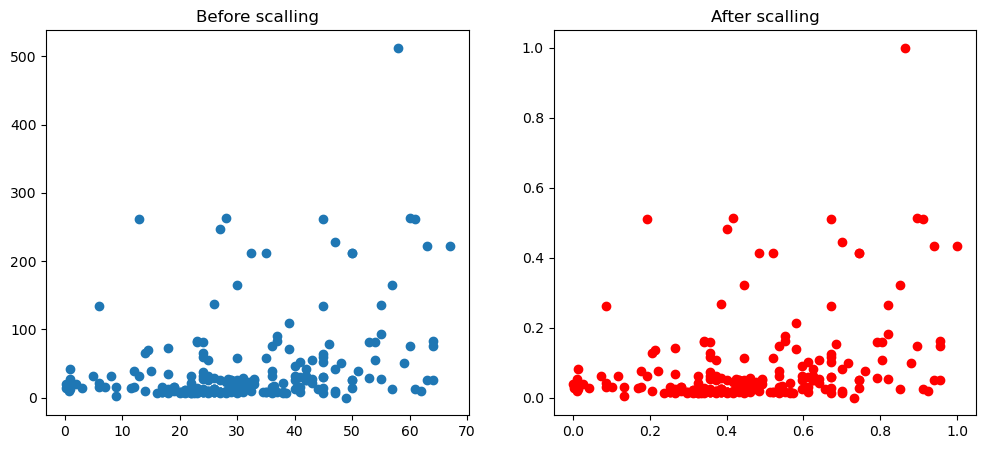

In [27]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Age"],x_train["Fare"])
a1.set_title("Before scalling")
a2.scatter(x_train_min["Age"],x_train_min["Fare"],color="red")
a2.set_title("After scalling")
plt.show()

In [28]:
r=RobustScaler()

In [29]:
x_train_rou=r.fit_transform(x_train)
x_test_rou=r.fit_transform(x_test)

In [30]:
h=r.get_feature_names_out()

In [31]:
x_train_rou=pd.DataFrame(x_train_rou,columns=h)

In [32]:
np.round(x_train_rou.describe(),1)

,Pclass,Age,SibSp,Parch,Fare
count,292.0,233.0,292.0,292.0,291.0
mean,-0.6,0.1,0.5,0.4,0.9
std,0.7,0.8,1.0,1.0,2.5
min,-1.6,-1.5,0.0,0.0,-0.6
25%,-1.0,-0.3,0.0,0.0,-0.3
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.7,1.0,0.0,0.7
max,0.0,2.2,8.0,9.0,21.2


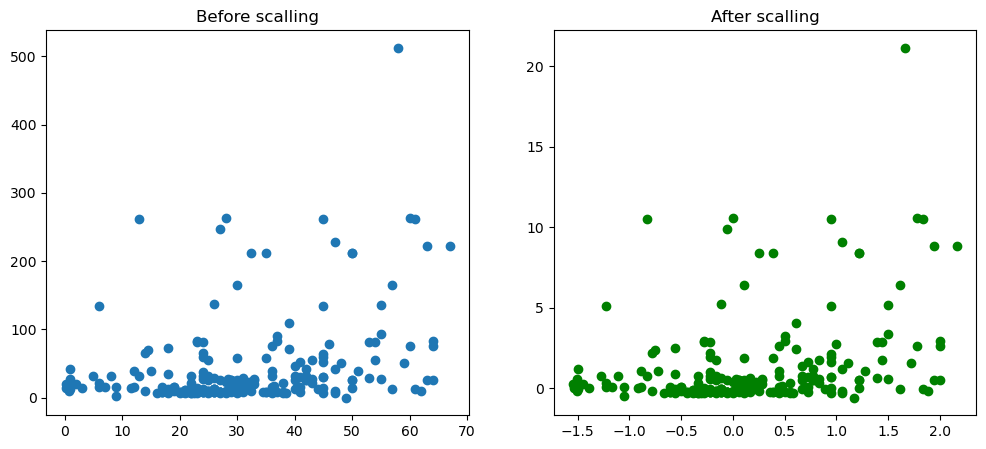

In [33]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Age"],x_train["Fare"])
a1.set_title("Before scalling")
a2.scatter(x_train_rou["Age"],x_train_rou["Fare"],color="green")
a2.set_title("After scalling")
plt.show()